In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data from the csv

In [2]:
data = pd.read_csv('bank.csv')

Have a look at the columns in the data set, to get a view if the data is mainly categorical or numerical data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


Based on the above information displayed about the data; the majority of the columns in the data contain categorical data with `age`, `balance`, `day`, `duration`, `campaign` and `pdays` being the only numerical columns. Although the `day` attribute is numerical in nature, it represents the day of the month that the person was called, this can be treated as a categorical feature also.

From the above information it can also be seen that there are attributes that are missing values, of the 2000 total rows in the dataset the following is true:
1. 12 age values are missing
2. 10 job values are missing
3. 104 education values are missing
4. 191 contact values are missing

In the two cells below, a look is taken at the first 5 and last 5 rows of the data to further become comfortable with the structure of the data

In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# Exploratory Question

Based on the nature of the data given, an interesting question to explore would be the nature of the different attributes and if any of the rows can be used to given any indication of whether a person is likely to have subscribed in the end or not.

The cell below shows some statistical analysis of the numerical data in the dataset. The default set of statistics produced by the `describe()` method is used as well as finding the median of the numerical attributes.

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [7]:
data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].median()

age          38.0
balance     551.0
duration    236.0
campaign      1.0
pdays       182.0
previous      2.0
dtype: float64

COME UP WITH SOME SORT OF CONCLUSION FOR THESE NUMERICAL STATS

Below is a plot of how categorical features are spread across the dataset.

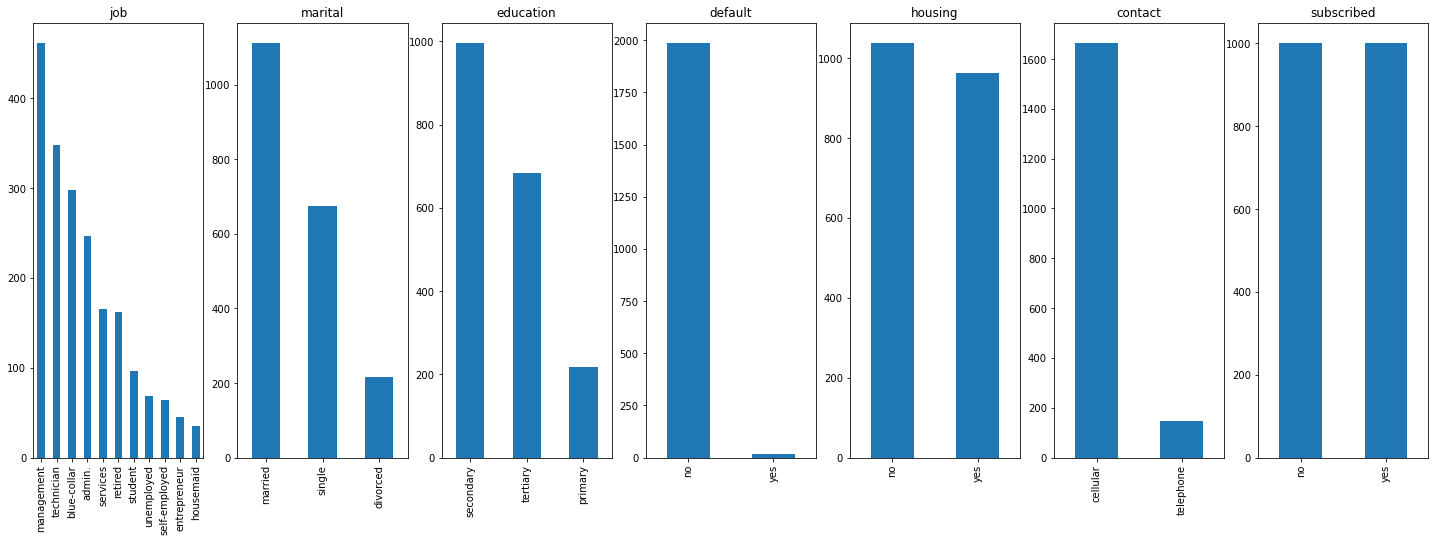

In [8]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'contact','subscribed']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(25,8))
for i, categorical_feature in enumerate(data[categorical_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

Based on the above categorical statistics looking at the two features of default and contact and how few examples there are for one of the categories in both examples (barley and yes in default and barely any telephone examples in contact) and the quite even spread of the final subscribed class (the attribute of interest to be predicted) it can be concluded that both default and contact are not useful attributes for use in predicting whether a user subscribed or not.

The two plots below show a distribution plot of the numerical attributes `balance` and `age`

Text(0, 0.5, 'Number of Clients')

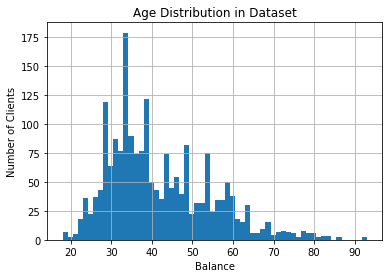

In [9]:
data['age'].hist(bins=60)
plt.title("Age Distribution in Dataset")
plt.xlabel('Balance')
plt.ylabel('Number of Clients')

Text(0.5, 1.0, 'Balance Distribution Box Plot')

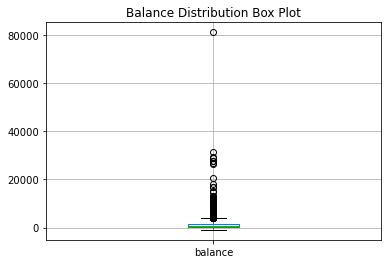

In [10]:
data.boxplot(column='balance')
plt.title("Balance Distribution Box Plot")

Both the above distribution plots have the same skew, both are negatively skewed and tend to smaller values. The majority of customers in the dataset are aged between 30 and 40 years old with some older outliers around the 70 to 90-year-old range. In the case of the balance box plot, the majorit of customers shown look to have very small values in their accounts, with mainly only very rare cases having larger balanced values in their accounts.

In [43]:
data.groupby('subscribed').describe()[['age', 'balance']]

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
subscribed                                                                      
no          991.0  40.655903   9.192425  22.0  33.0  39.0  48.0  64.0  1000.0   
yes         997.0  42.843531  15.382656  18.0  31.0  38.0  54.0  93.0  1000.0   

                                                                           
                mean          std    min     25%    50%      75%      max  
subscribed                                                                 
no           942.862  2007.134003 -980.0  114.75  393.0   970.25  26306.0  
yes         1884.465  3891.864047 -205.0  315.00  875.0  2304.50  81204.0

Taking a look further into both numerical values and how they relate to the whether a person subscribed or not the following small conclusions can be made:
1. The average age of a person who subscribes or not are quite similar, this may indicate that the age of a person is not the most accurate or useful predictor of if a person subscribed
2. A average balance of a person who subscribed is almost double that of someone who did not. This may indicate the usefulness of this attribute in predicting if a person subscribed.

The viability of this assuption is backed by the fact the total number of the people in both subscribed categories is even. This is shown in the cell below

In [12]:
data['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

In [14]:
categorical_features

['job', 'marital', 'education', 'default', 'housing', 'contact', 'subscribed']

Next we will take a look at the combined distribution of the categorical features of interest. More specifically we will see how `job`, `marital`, `education` and `housing` relate to how likely a person is to have subscribed or not

Text(0, 0.5, 'Number of Customers')

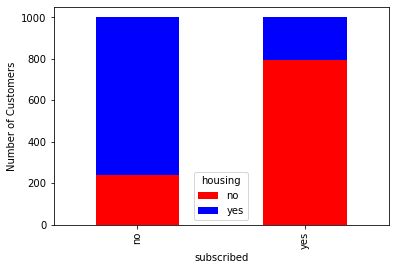

In [16]:
housing_crosstab = pd.crosstab(data['subscribed'], data['housing'])
housing_crosstab.plot(kind='bar', stacked=True, color=['red','blue'])
plt.ylabel('Number of Customers')

From the above bar chart plot it we can see that whether the person has a housing loan is a good indicator/predictor of whether a person is going to subscribe or not. The majority of people who subscribed did not have a housing loan while the majority of people who did not subscribe already had a housing loan. Without knowing what the product that is being marketed, it can also be assumed that the product is housing loan related in some way.

In [17]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
housing_pivot_table = data.pivot_table(values='housing',
                                       index='subscribed',
                                       aggfunc=lambda x: x.map({'yes': 1, 'no': 0}).mean())

In [19]:
housing_pivot_table

,housing
subscribed,
no,0.760
yes,0.203


The pivot table above, further backs up the conclusion of the bar char above. The probability of someone subscribing with no housing loan is 76% while the probability of someone subscribing with a housing loan is only 20%. This is an indication that housing is a very good predictor of whether a person will subscribe or not.

We will now look at how educational level predicts whether a person will subscribe or not

Text(0.5, 1.0, 'Education Proportions in Subscribed Categories')

<Figure size 1440x720 with 0 Axes>

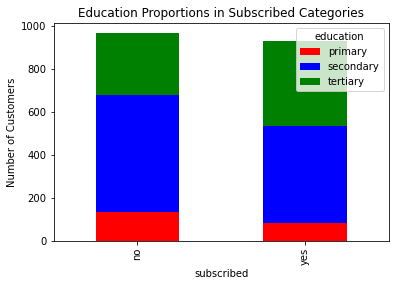

In [32]:
education_crosstab = pd.crosstab(data['subscribed'], data['education'])
education_crosstab.plot(kind='bar', stacked=True, color=['red','blue','green'])
plt.ylabel('Number of Customers')
plt.title("Education Proportions in Subscribed Categories")

Text(0.5, 1.0, 'Marital Status Proportions in Subscribed Categories')

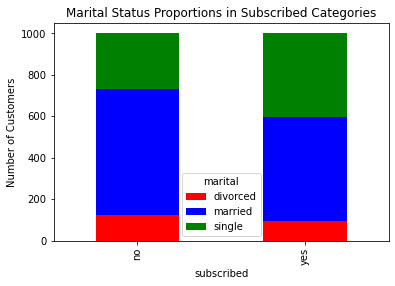

In [33]:
tab = pd.crosstab(data['subscribed'], data['marital'])
tab.plot(kind='bar', stacked=True, color=['red','blue','green'])
plt.ylabel('Number of Customers')
plt.title("Marital Status Proportions in Subscribed Categories")

Text(0.5, 1.0, 'Job Category Proportions in Subscribed Categories')

<Figure size 1800x504 with 0 Axes>

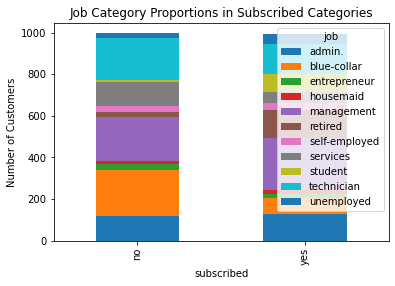

In [40]:

plt.figure(figsize=(25,7))
tab = pd.crosstab(data['subscribed'], data['job'])
tab.plot(kind='bar', stacked=True)
plt.ylabel('Number of Customers')
plt.title("Job Category Proportions in Subscribed Categories")

Education and marital status do not look to have any immediate correlation or relationship with weather a person will subscribe or not, but in the case of the job type, there are some jobs that do seem to have some relationship or predictive ability on weather a person will end up subscribing or not. Blue collar workers seem less likely to subscribe, a higher proportion of students tend to subscribe. A larger proportion of technicians and service workers tend to not subscribe. People who are retired and no longer working also tend to be more likely to subsribe.

## Conclusion

The purpose of this EDA was to try and understand which of the features in the dataset could be best suited or used to determine whether a particular customer subscribed or not. For numerical features it was found that the balance in a persons account gave some good indication of whether a person subscribed or not. People who subscribed tended to have much higher balance in their accounts in comparison to the low balance of those who did not subscribe. For categorical features it was discovered that whether the person had a housing loan was probably the most obvious indication of whether they would subscribe. A person who didn't have a housing loan has a 76% probably of subscribing. Particular types of job also have some predictive capability, these were found to be blue collar workers (less likely to subscribe), students (more likely to subscribe), service workers and technicians (less likely to subscribe). People who were retired also were more likely to be subscribers.